In [9]:
from PIL import Image
import torch
from transformers import AutoProcessor, AutoModelForCausalLM
import os
import matplotlib.pyplot as plt

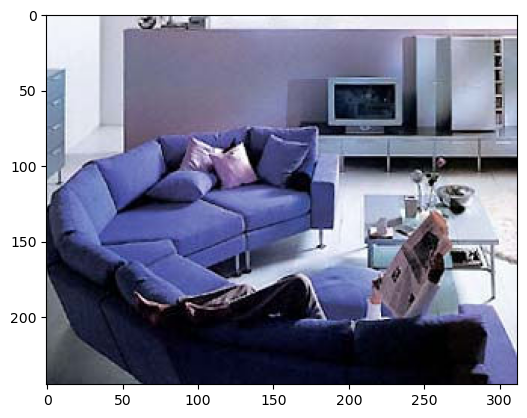

In [13]:
img_idx = 2
img_path = "/home/thesis/marx/wilson_gen/WILSON/data/voc/JPEGImages/" + os.listdir("/home/thesis/marx/wilson_gen/WILSON/data/voc/JPEGImages")[img_idx]
image = Image.open(img_path).convert("RGB")
plt.imshow(image)
plt.show()

In [15]:
model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Florence-2-large",
    torch_dtype=torch.float32,
    trust_remote_code=True
).to("cuda")
processor = AutoProcessor.from_pretrained(
    "microsoft/Florence-2-large",
    trust_remote_code=True
)

In [51]:
prompt = "<MORE_DETAILED_CAPTION>"
inputs = processor(text=prompt, images=image, return_tensors="pt").to("cuda", torch.float32)
generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values = inputs["pixel_values"],
    max_new_tokens = 1024,
    num_beams=3,
    do_sample=False
)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
parsed_answer = processor.post_process_generation(generated_text, task=prompt, image_size = (image.width, image.height))
print(parsed_answer[prompt])

The image shows a modern living room with a large blue sectional sofa in the center. The sofa has multiple pillows in different shades of purple and pink, and there is a coffee table in front of it with a newspaper on it. On the right side of the sofa, there is another coffee table with a vase of flowers and a bowl of fruit. In the background, there are two large windows with white curtains, and a flat-screen TV mounted on the wall above the sofa. The floor is made of light-colored tiles, and the walls are painted in a light purple color. The overall style of the room is sleek and contemporary.
